In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import geopandas as gpd
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [61]:
gdf = gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")

In [62]:
data = gdf

In [63]:
data["E_WHITE"] = data["E_TOTPOP"] - data[
    ["E_AFAM", "E_HISP", "E_ASIAN", "E_AIAN", "E_NHPI", "E_TWOMORE", "E_OTHERRACE"]
].sum(axis=1)

In [64]:
len(data[data["_hws"] != 0])

18107

In [65]:
# normalize demographic variables by each groups' total population
demographic_cols = [
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
    "E_NHPI",
    "E_TWOMORE",
    "E_OTHERRACE",
    "E_WHITE",
    "E_TOTPOP",
]

for dc in demographic_cols:
    data[dc + "_normalized"] = data[dc] * 100 / data[dc].sum()

data = data.rename(
    columns={
        "E_WHITE_normalized": "White",
        "E_AFAM_normalized": "Black",
        "E_HISP_normalized": "Hispanic",
        "E_ASIAN_normalized": "Asian",
        "E_AIAN_normalized": "American Indian or \nAlaska Native",
    }
)

cats = ["White", "Black", "Hispanic", "Asian", "American Indian or \nAlaska Native"]

In [66]:
total_cols = [
    "E_WHITE",
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
]
total_cols_labels = ["White", "Black", "Hispanic", "Asian", "American Indian or \nAlaska Native"]

## Pie plots per demographic population

In [67]:
import plotting

hspts = plotting.get_hotspot_list()

In [68]:
hspts_mini = ["wfday", "heatday", "smoke_pm_non_zero", "hw", "hs", "hws", "ws"]

In [69]:
df = data

In [70]:
def get_xlabel(hspt, index):
    if hspt in [
        "wfday",
        "wfday_2d",
        "hw",
        "hws",
        "ws",
        "hws5",
        "ws5",
        "hws_2d",
        "ws_2d",
    ]:
        return f"{index} Exposure Days"
    else:
        return f"{index}"

In [21]:
# for hspt in hspts_mini:
#     #print(hspt)
#     df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])
#     totals_df = df.groupby("exposure_category")[total_cols].sum()
    
#     colors = sns.color_palette("colorblind", n_colors=totals_df.shape[0])
#     fig, axs = plt.subplots(1, 6, figsize=(12, 3))  # 1 row, 5 columns of subplots
#     labels = ""

#     totals_df.fillna(0, inplace=True)
#     for i, (index, row) in enumerate(totals_df.iterrows()):
#         xlabel = get_xlabel(hspt, index)
#         if (row < 3).any():
#             explode = (0, 0, 0.5, 1, 1.5)
#         else:
#             explode = (0, 0, 0, 0, 0)
        
#         try:
#             _, _, autopcts = axs[i].pie(
#                 row,
#                 startangle=45,
#                 colors=colors,
#                 # autopct="%1.1f%%",
#                 # pctdistance=1.3,
#                 # radius=1.5,
#                 # #explode=explode,
#                 # wedgeprops=dict(width=0.5),
#             )
#         except:
#             print(hspt)
#             print(totals_df)
#         labels = row.index
#         axs[i].set_title(xlabel)
#         axs[i].axis("equal")
#         plt.setp(autopcts, **{"fontsize": 8})  # "backgroundcolor": "white",


#     legend_handles = [
#         mpatches.Patch(color=color, label=lab)
#         for color, lab in zip(colors, total_cols_labels)
#     ]
#     axs[5].legend(handles=legend_handles, loc="center left")
#     axs[5].axis("off")

#     plt.suptitle(helper_400.get_title(hspt, line_break=False))
#     plt.tight_layout()
#     plt.savefig("figures/pie_chart" + "_" + hspt + "1010_wc.png")

## Pie plots normalized per demographic population

In [71]:
import matplotlib.patches as mpatches

In [72]:
plt.rcParams["font.family"] = "Times New Roman"

In [101]:
options = {
        "wfday": "Wildfire Burn Zone",
        "heatday": "Extreme Heat",
        "smoke_pm_non_zero": "Wildfire Smoke",
        "smoke_pm_gt_five": "Wildfire Smoke (over 5 μg/m\u00b3)",
        "hw": "Extreme Heat-Wildfire Burn Zone",
        "hs": "Extreme Heat-Wildfire Smoke",
        "hws": "Extreme Heat-Wildfire Burn Zone-Wildfire Smoke",
        "_hws": "Extreme Heat or Wildfire Burn Zone or Wildfire Smoke",
        "ws": "Wildfire Burn Zone-Wildfire Smoke",
        "hs5": "Extreme Heat-Wildfire Smoke (over 5 μg/m\u00b3)",
        "hws5": "Extreme Heat-Wildfire Burn Zone-Wildfire Smoke (over 5 μg/m\u00b3)",
        "ws5": "Wildfire Burn Zone-Wildfire Smoke (over 5 μg/m\u00b3)",
    }

In [102]:
cats

['White', 'Black', 'Hispanic', 'Asian', 'American Indian or \nAlaska Native']

/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_88532/1074122518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df = df.groupby("exposure_category")[cats].sum()
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_88532/1074122518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df = df.groupby("exposure_category")[cats].sum()
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_88532/1074122518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

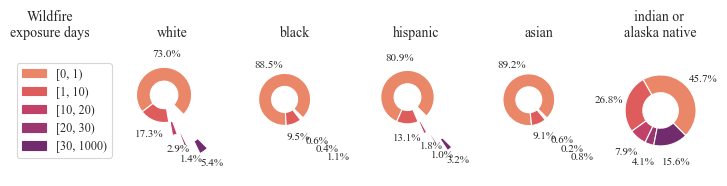

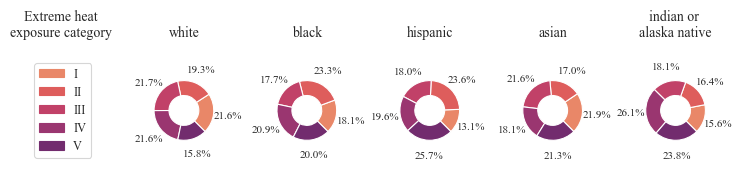

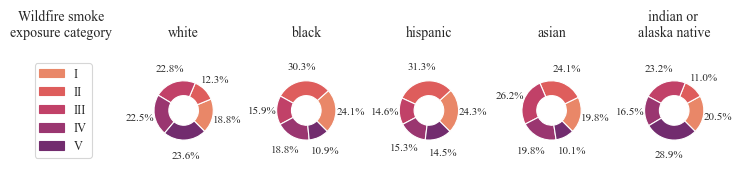

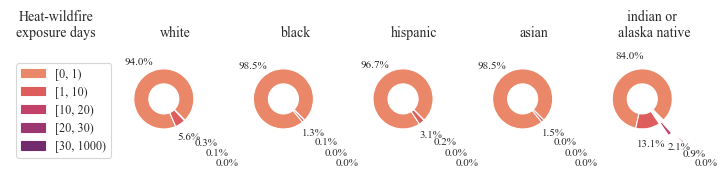

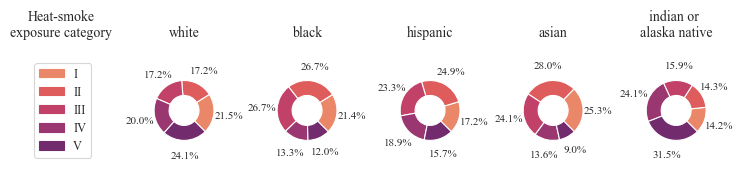

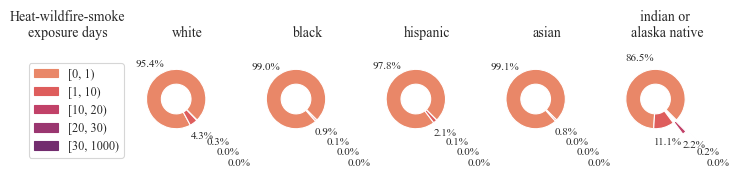

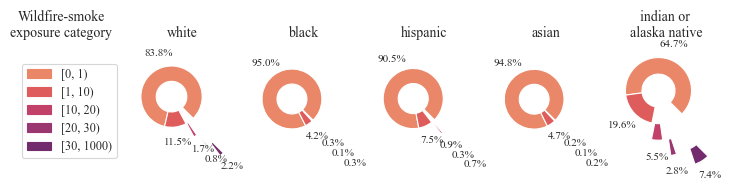

In [19]:
for hspt in hspts_mini:
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])
    normalized_df = df.groupby("exposure_category")[cats].sum()
    normalized_df = normalized_df.transpose()
    colors = sns.color_palette("flare", n_colors=normalized_df.shape[0])

    fig, axs = plt.subplots(1, 6, figsize=(7.2, 1.8))  # 1 row, 5 columns of subplots

    labels = ""
    for i, (index, row) in enumerate(normalized_df.iterrows()):
        xlabel = f"{index}"
        if (row < 3).any():
            explode = (0, 0, 0.5, 1, 1.5)
        else:
            explode = (0, 0, 0, 0, 0)
        _, _, autopcts = axs[i+1].pie(
            row,
            startangle=-45,
            colors=colors,
            autopct="%1.1f%%",
            pctdistance=1.5,
            radius=1,
            explode=explode,
            wedgeprops=dict(width=0.5),
            frame=False,
        )
        labels = row.index
        axs[i+1].set_title(xlabel, fontsize=10)
        axs[i+1].axis("equal")

        plt.setp(autopcts, **{"fontsize": 8})  # "backgroundcolor": "white",

    legend_handles = [
        mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)
    ]
    axs[0].legend(handles=legend_handles, loc="center left")
    axs[0].axis("off")
    lg_title= options[hspt]+"\nexposure days"
    if hspt in ["heatday", "smoke_pm_non_zero", "ws", "hs"]:
        lg_title = options[hspt]+"\nexposure category"
    axs[0].set_title(lg_title, fontsize=10)

    # plt.suptitle(helper_400.get_title(hspt, line_break=False), fontsize=14)
    plt.tight_layout(pad=0.5, w_pad=0, h_pad=0)
    plt.savefig("figures/pie_chart_normalized" + "_" + hspt + "_wc.png", dpi=300, bbox_inches='tight')

/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_88532/885999172.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df = df.groupby("exposure_category")[cats].sum()
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_88532/885999172.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df = df.groupby("exposure_category")[cats].sum()
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_88532/885999172.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

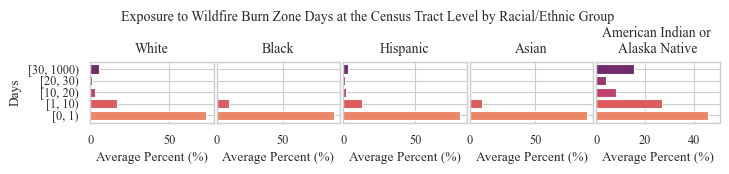

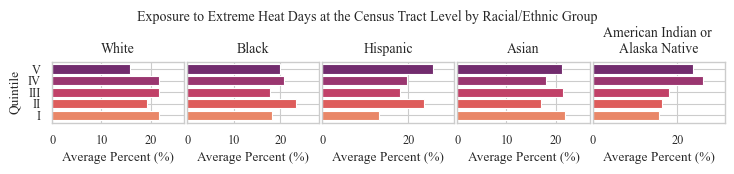

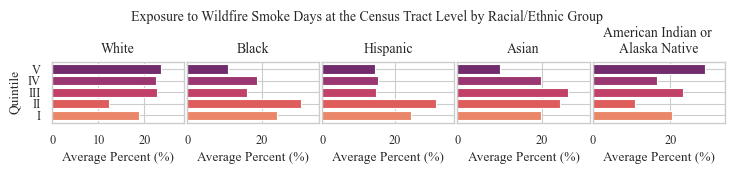

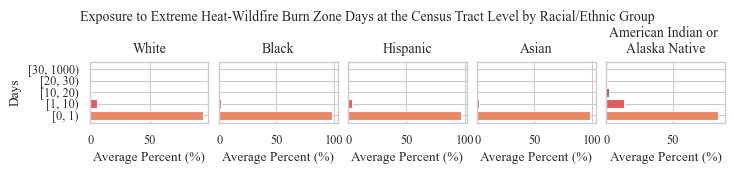

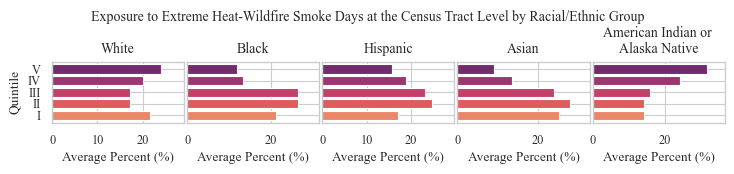

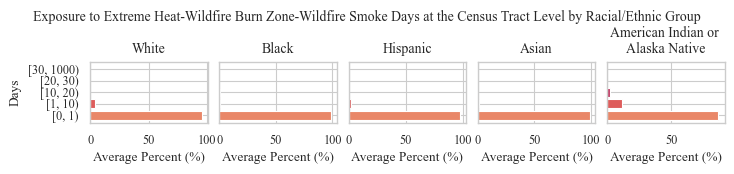

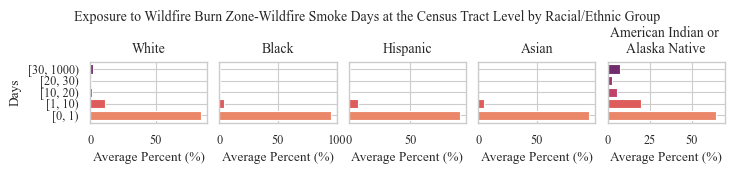

In [103]:
for hspt in hspts_mini:
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])
    normalized_df = df.groupby("exposure_category")[cats].sum()
    normalized_df = normalized_df.transpose()
    colors = sns.color_palette("flare", n_colors=normalized_df.shape[0])

    fig, axs = plt.subplots(1, 5, figsize=(7.2, 1.6), sharey=True)  # 1 row, 5 columns of subplots
    #fig, axs = plt.subplots(1, 6, figsize=(12, 4), sharey=True)  # 1 row, 6 columns of subplots
    labels = ""

    for i, (index, row) in enumerate(normalized_df.iterrows()):
        xlabel = f"{index}"
        labels = [str(label) for label in row.index]
        axs[i].barh(labels, row, color=colors)
        axs[i].set_title(xlabel, fontsize=10)
        # axs[i].set_xlim(0, 100)
        # if i > 0:  # Hide y-axis labels for all but the first subplot
        #     #axs[i].set_yticklabels([])
        #     axs[i].set_ylabel([])
        if i == 0:
            #axs[i].set_yticklabels(labels, rotation=0)
            if "III" in labels:
                axs[i].set_ylabel("Quintile")
            else:
                axs[i].set_ylabel("Days")
        # rotate x-axis labels and use integers
        # Ensure y-axis starts at 0 and ends slightly above the highest number for visual clarity
        axs[i].set_xlim(0, max(row) + 5)
        axs[i].set_xlabel("Average Percent (%)") 

        # Formatting x-ticks to avoid decimals and rotate for readability
        #axs[i].set_xticklabels(axs[i].get_xticks(), rotation=90)
        # Adjusting tick parameters to ensure no decimal points
        #axs[i].set_xticklabels([f'{int(tick)}' for tick in axs[i].get_xticks()])


    # Add a legend outside of the last subplot
    #legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    #fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.15, 0.8))

    legend_handles = [
        mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)
    ]

    # axs[5].legend(handles=legend_handles, loc="center left")
    # axs[5].axis("off")


    #lg_title= options[hspt] +" "
    #if hspt in ["heatday", "smoke_pm_non_zero", "ws", "hs"]:
    lg_title = options[hspt]+" Days at the Census Tract Level by Racial/Ethnic Group"
    # axs[5].set_title(lg_title, fontsize=10)
    # axs.title(lg_title, fontsize=10)
    plt.suptitle("Exposure to "+lg_title, fontsize=10)
    # plt.suptitle(helper_400.get_title(hspt, line_break=False), fontsize=14)
    plt.tight_layout(pad=0.2, w_pad=0, h_pad=0)
    plt.savefig("figures/pie_chart_normalized" + "_" + hspt + "_wc_0124.png", dpi=300, bbox_inches='tight')